# Making predictions for real estate prices in Tunisia
 
This file shows you the path for your Kaggle competition: after you download the data from your Kaggle competition (train.csv and test.csv), train your model(s), make predictions for the test data, and submit them back to your Kaggle competition.

## Remark:
You can write in latex inside Jupyter notebook (cell type: "Markdown"):
$$\alpha+\sqrt{\frac{\beta+1}{\gamma}}$$
You can also generate a PDF file, or a TEX file,... (Go to File -> Download as)

## Import libraries and methods

In [1]:
import numpy as np # linear algebra
import pandas as pd # dataframes, data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plots
# Tools from Scikit Learn library:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

## Load data from train and test files

In [2]:
# Loading the training dataset as a Pandas DataFrame
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
display(df_train)
display(df_test)

,Id,category,type,city,region,size,room_count,bathroom_count,price
0,46,Terrains et Fermes,À Vendre,Ariana,Raoued,NaN,NaN,NaN,90000.00
1,5683,Appartements,À Vendre,Ariana,Ariana,98.0,3.0,1.0,130.00
2,10844,Terrains et Fermes,À Vendre,Ariana,Raoued,NaN,NaN,NaN,400.00
3,289,Appartements,À Louer,Sfax,Route Menzel Chaker,95.0,2.0,1.0,0.48
4,8267,Maisons et Villas,À Vendre,Bizerte,Bizerte,270.0,7.0,3.0,520.00
...,...,...,...,...,...,...,...,...,...
8918,6237,Maisons et Villas,À Vendre,Nabeul,Soliman,528.0,3.0,1.0,528.00
8919,5853,Maisons et Villas,À Louer,Ariana,Jardins D'el Menzah,130.0,2.0,2.0,0.70
8920,3519,Appartements,À Louer,Sousse,Autres villes,60.0,2.0,1.0,0.70
8921,688,Appartements,À Vendre,Ben arous,Autres villes,70.0,1.0,1.0,110.00


,Id,category,type,city,region,size,room_count,bathroom_count
0,5376,Terrains et Fermes,À Vendre,Médenine,Zarzis,NaN,NaN,NaN
1,9637,Appartements,À Vendre,Ariana,Ariana Ville,135.0,3.0,2.0
2,9411,Appartements,À Vendre,Tunis,Menzah,100.0,1.0,1.0
3,3265,Maisons et Villas,À Vendre,Nabeul,Hammamet,200.0,3.0,2.0
4,4979,Maisons et Villas,À Vendre,Tunis,Autres villes,180.0,4.0,1.0
...,...,...,...,...,...,...,...,...
3820,3629,Appartements,À Vendre,Tunis,Centre Urbain Nord,68.0,2.0,1.0
3821,9176,Maisons et Villas,À Vendre,Sfax,Route el Ain,440.0,5.0,2.0
3822,10156,Appartements,À Vendre,Ariana,Ennasr,188.0,3.0,2.0
3823,6200,Appartements,À Louer,Tunis,La Marsa,70.0,1.0,1.0


In [3]:
# Statistical info about data
df_train.describe()

,Id,size,room_count,bathroom_count,price
count,8923.000000,6533.000000,6533.000000,6533.000000,8.923000e+03
mean,6361.404012,179.489668,2.767029,1.402265,1.563912e+04
std,3687.680380,192.821137,1.625323,0.782036,1.066425e+06
min,1.000000,20.000000,1.000000,0.000000,1.000000e-02
25%,3152.500000,83.000000,2.000000,1.000000,8.500000e-01
50%,6330.000000,120.000000,3.000000,1.000000,8.800000e+01
75%,9580.500000,200.000000,3.000000,2.000000,2.561350e+02
max,12747.000000,2000.000000,20.000000,10.000000,1.000000e+08


In [4]:
# Statistical info about data
df_test.describe()

,Id,size,room_count,bathroom_count
count,3825.000000,2800.000000,2800.000000,2800.000000
mean,6401.717647,178.383571,2.775000,1.407500
std,3662.931941,196.344298,1.617854,0.834681
min,0.000000,20.000000,1.000000,0.000000
25%,3260.000000,83.000000,2.000000,1.000000
50%,6483.000000,120.000000,3.000000,1.000000
75%,9500.000000,193.000000,3.000000,2.000000
max,12745.000000,2000.000000,20.000000,10.000000


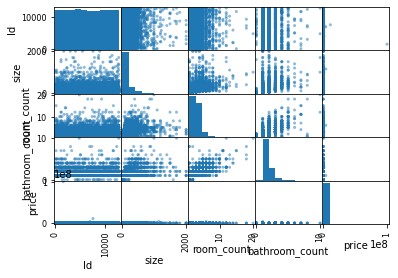

In [5]:
pd.plotting.scatter_matrix(df_train)
plt.show()

## Encode categorical data

In [6]:
# In order to encode the categorical variables (by one-hot encoding), 
# we need to "get_dummies" from all the data. So we first concatenate them, and then get_dummies
# Make test indices start after the end of train indices
df_test.set_index(df_test.index+len(df_train),inplace=True)
df = df_train.append(df_test)
df = pd.get_dummies(df)
df

,Id,size,room_count,bathroom_count,price,category_Appartements,category_Bureaux et Plateaux,category_Colocations,category_Locations de vacances,"category_Magasins, Commerces et Locaux industriels",...,region_Tozeur,region_Tunis,region_Téboulba,region_Téboursouk,region_Utique,region_Zaghouan,region_Zaouit-Ksibat Thrayett,region_Zarzis,region_Zarzouna,region_Zéramdine
0,46,NaN,NaN,NaN,90000.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5683,98.0,3.0,1.0,130.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10844,NaN,NaN,NaN,400.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,289,95.0,2.0,1.0,0.48,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8267,270.0,7.0,3.0,520.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12743,3629,68.0,2.0,1.0,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12744,9176,440.0,5.0,2.0,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12745,10156,188.0,3.0,2.0,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12746,6200,70.0,1.0,1.0,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Get back to train and test data, after being encoded by "get_dummies"
df_train = df[:len(df_train)].copy()
df_test = df[len(df_train):len(df)].copy()
df_test.drop(columns=['price'], inplace=True)
df_test.reset_index(drop=True, inplace=True)
display(df_train)
display(df_test)

,Id,size,room_count,bathroom_count,price,category_Appartements,category_Bureaux et Plateaux,category_Colocations,category_Locations de vacances,"category_Magasins, Commerces et Locaux industriels",...,region_Tozeur,region_Tunis,region_Téboulba,region_Téboursouk,region_Utique,region_Zaghouan,region_Zaouit-Ksibat Thrayett,region_Zarzis,region_Zarzouna,region_Zéramdine
0,46,NaN,NaN,NaN,90000.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5683,98.0,3.0,1.0,130.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10844,NaN,NaN,NaN,400.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,289,95.0,2.0,1.0,0.48,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8267,270.0,7.0,3.0,520.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8918,6237,528.0,3.0,1.0,528.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8919,5853,130.0,2.0,2.0,0.70,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8920,3519,60.0,2.0,1.0,0.70,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8921,688,70.0,1.0,1.0,110.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,Id,size,room_count,bathroom_count,category_Appartements,category_Bureaux et Plateaux,category_Colocations,category_Locations de vacances,"category_Magasins, Commerces et Locaux industriels",category_Maisons et Villas,...,region_Tozeur,region_Tunis,region_Téboulba,region_Téboursouk,region_Utique,region_Zaghouan,region_Zaouit-Ksibat Thrayett,region_Zarzis,region_Zarzouna,region_Zéramdine
0,5376,NaN,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,9637,135.0,3.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9411,100.0,1.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3265,200.0,3.0,2.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4979,180.0,4.0,1.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3820,3629,68.0,2.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3821,9176,440.0,5.0,2.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3822,10156,188.0,3.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3823,6200,70.0,1.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Prepare data for train and test

In [8]:
# Prepare data for training and test
# replace "NaN" by median of column (but maybe it's not the best way to do...!)
df_train.fillna(df_train.median(), inplace=True)
df_test.fillna(df_test.median(), inplace=True)
display(df_train)
display(df_test)

,Id,size,room_count,bathroom_count,price,category_Appartements,category_Bureaux et Plateaux,category_Colocations,category_Locations de vacances,"category_Magasins, Commerces et Locaux industriels",...,region_Tozeur,region_Tunis,region_Téboulba,region_Téboursouk,region_Utique,region_Zaghouan,region_Zaouit-Ksibat Thrayett,region_Zarzis,region_Zarzouna,region_Zéramdine
0,46,120.0,3.0,1.0,90000.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5683,98.0,3.0,1.0,130.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10844,120.0,3.0,1.0,400.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,289,95.0,2.0,1.0,0.48,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8267,270.0,7.0,3.0,520.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8918,6237,528.0,3.0,1.0,528.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8919,5853,130.0,2.0,2.0,0.70,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8920,3519,60.0,2.0,1.0,0.70,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8921,688,70.0,1.0,1.0,110.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,Id,size,room_count,bathroom_count,category_Appartements,category_Bureaux et Plateaux,category_Colocations,category_Locations de vacances,"category_Magasins, Commerces et Locaux industriels",category_Maisons et Villas,...,region_Tozeur,region_Tunis,region_Téboulba,region_Téboursouk,region_Utique,region_Zaghouan,region_Zaouit-Ksibat Thrayett,region_Zarzis,region_Zarzouna,region_Zéramdine
0,5376,120.0,3.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,9637,135.0,3.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9411,100.0,1.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3265,200.0,3.0,2.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4979,180.0,4.0,1.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3820,3629,68.0,2.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3821,9176,440.0,5.0,2.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3822,10156,188.0,3.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3823,6200,70.0,1.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Create input X and output y datasets for training and test
# Don't forget to drop 'Id' column (it is not a feature!)
X_train = np.array(df_train.drop(['Id','price'],1))
y_train = np.array(df_train['price'])
X_test = np.array(df_test.drop(['Id'],1))
print(X_train)
print(y_train)
print(X_test)

[[120.   3.   1. ...   0.   0.   0.]
 [ 98.   3.   1. ...   0.   0.   0.]
 [120.   3.   1. ...   0.   0.   0.]
 ...
 [ 60.   2.   1. ...   0.   0.   0.]
 [ 70.   1.   1. ...   0.   0.   0.]
 [120.   3.   1. ...   0.   0.   0.]]
[9.0e+04 1.3e+02 4.0e+02 ... 7.0e-01 1.1e+02 1.7e+01]
[[120.   3.   1. ...   1.   0.   0.]
 [135.   3.   2. ...   0.   0.   0.]
 [100.   1.   1. ...   0.   0.   0.]
 ...
 [188.   3.   2. ...   0.   0.   0.]
 [ 70.   1.   1. ...   0.   0.   0.]
 [ 80.   4.   1. ...   0.   0.   0.]]


## Model training

In [10]:
# Model choice
model = LinearRegression()
# Model training
model.fit(X_train, y_train)
# Model predictions on the trained data
y_train_pred = model.predict(X_train)
# Model evaluations on the training data
print(model)
print('  Train R2 = ', '%.3f' %r2_score(y_train, y_train_pred))
print('  Train RMSE = ', '%.3E' %np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('  Train MAPE = ', '%.0f' %mean_absolute_percentage_error(y_train,y_train_pred))

LinearRegression()
  Train R2 =  0.986
  Train RMSE =  1.263E+05
  Train MAPE =  9251


## Model predictions for the test data

In [11]:
# Make predictions from the input test
y_test_pred = model.predict(X_test)
# Add the predictions to the test data
df_test['price'] = y_test_pred
# Create the dataframe with only the Id and predictions columns (to be submitted)
df_subm = df_test[['Id','price']].copy()
df_subm

,Id,price
0,5376,220.0000
1,9637,-980.5000
2,9411,1674.7500
3,3265,-4577.5000
4,4979,8448.3750
...,...,...
3820,3629,2822.9375
3821,9176,3299.2500
3822,10156,5473.8750
3823,6200,-3756.9375


## Create the file to be submitted to Kaggle

In [12]:
# Save to a csv file, which is the file to be submitted for competition scoring
df_subm.to_csv('submission_1.csv', index=False)